<a href="https://colab.research.google.com/github/plait38/DADS6003-ML-/blob/main/Ml_6610422009_As01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [2]:
#!pip install pandas
#!pip install numpy
#!pip install requests
#!pip install lxml
#!pip install yfinance

In [3]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


1.เลือกหุ้น 1 หุ้น

In [241]:
fc = yf.Ticker('FCNCA') #First Citizens BancShares, Inc.
interval = '1h'
start = '2024-1-1'
end = '2024-2-22'
fc_df = fc.history(interval=interval,start=start,end=end)
fc_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,1418.969971,1423.010010,1410.709961,1412.020020,14968,0.0,0.0
2024-01-02 10:30:00-05:00,1411.209961,1423.670044,1411.209961,1423.670044,7240,0.0,0.0
2024-01-02 11:30:00-05:00,1430.000000,1430.000000,1429.055054,1429.055054,3466,0.0,0.0
2024-01-02 12:30:00-05:00,1438.212524,1438.354980,1433.000000,1434.180054,7182,0.0,0.0
2024-01-02 13:30:00-05:00,1427.989990,1432.479980,1427.989990,1428.869995,5342,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-21 11:30:00-05:00,1498.579956,1502.199951,1493.849976,1496.599976,5437,0.0,0.0
2024-02-21 12:30:00-05:00,1497.964966,1502.569946,1493.300049,1498.430054,7473,0.0,0.0
2024-02-21 13:30:00-05:00,1506.959961,1519.219971,1504.729980,1517.969971,8581,0.0,0.0


In [242]:
# Technical Indicators
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib

--2024-02-22 04:18:15--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-22 04:18:15--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-22 04:18:15--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [243]:
# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Data fetching
from pandas_datareader import data as pdr
yf.pdr_override()

In [244]:
import numpy as np
import pandas as pd

Oversold (RSI < 20 ) / Overbought (RSI > 80)

In [245]:
#หาค่า mean ของราคาหุ้นในช่วง 14 วัน
fc_df['S_14'] = fc_df['Close'].rolling(window=14).mean()
#ดู correlation ของราคาปิดในช่วง 14 วัน
fc_df['Corr'] = fc_df['Close'].rolling(window=14).corr(fc_df['S_14'])
#ดู RSI ของหุ้นในช่วง 14 วัน
fc_df['RSI'] = ta.RSI(np.array(fc_df['Close']), timeperiod =14)
fc_df['Open-Close'] = fc_df['Open'] - fc_df['Close'].shift(1)
fc_df['Open-Open'] = fc_df['Open'] - fc_df['Open'].shift(1)
fc_df = fc_df.dropna()
X = fc_df.iloc[:,:9]
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2024-01-05 14:30:00-05:00,1394.060059,1395.729980,1384.270020,1388.449951,10060,0.0,0.0,1398.167847,0.697462
2024-01-05 15:30:00-05:00,1385.709961,1387.689941,1381.425049,1384.699951,14671,0.0,0.0,1397.064985,0.772596
2024-01-08 09:30:00-05:00,1389.000000,1399.866455,1384.300049,1399.866455,5719,0.0,0.0,1396.358303,0.608494
2024-01-08 10:30:00-05:00,1401.300049,1405.689941,1395.989990,1403.510010,8223,0.0,0.0,1396.249015,0.391347
2024-01-08 11:30:00-05:00,1403.670044,1404.599976,1399.000000,1402.859985,13497,0.0,0.0,1396.159014,0.181659
...,...,...,...,...,...,...,...,...,...
2024-02-21 11:30:00-05:00,1498.579956,1502.199951,1493.849976,1496.599976,5437,0.0,0.0,1512.742850,0.321412
2024-02-21 12:30:00-05:00,1497.964966,1502.569946,1493.300049,1498.430054,7473,0.0,0.0,1510.987854,0.587281
2024-02-21 13:30:00-05:00,1506.959961,1519.219971,1504.729980,1517.969971,8581,0.0,0.0,1510.628566,0.451015


In [246]:
fc_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2024-01-05 14:30:00-05:00,1394.060059,1395.729980,1384.270020,1388.449951,10060,0.0,0.0,1398.167847,0.697462,41.673399,1.480103,4.060059
2024-01-05 15:30:00-05:00,1385.709961,1387.689941,1381.425049,1384.699951,14671,0.0,0.0,1397.064985,0.772596,39.897589,-2.739990,-8.350098
2024-01-08 09:30:00-05:00,1389.000000,1399.866455,1384.300049,1399.866455,5719,0.0,0.0,1396.358303,0.608494,49.306304,4.300049,3.290039
2024-01-08 10:30:00-05:00,1401.300049,1405.689941,1395.989990,1403.510010,8223,0.0,0.0,1396.249015,0.391347,51.279520,1.433594,12.300049
2024-01-08 11:30:00-05:00,1403.670044,1404.599976,1399.000000,1402.859985,13497,0.0,0.0,1396.159014,0.181659,50.898877,0.160034,2.369995
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21 11:30:00-05:00,1498.579956,1502.199951,1493.849976,1496.599976,5437,0.0,0.0,1512.742850,0.321412,42.187277,-0.130005,4.399902
2024-02-21 12:30:00-05:00,1497.964966,1502.569946,1493.300049,1498.430054,7473,0.0,0.0,1510.987854,0.587281,43.469855,1.364990,-0.614990
2024-02-21 13:30:00-05:00,1506.959961,1519.219971,1504.729980,1517.969971,8581,0.0,0.0,1510.628566,0.451015,54.959391,8.529907,8.994995


Define Target/Dependent Variable

In [247]:
y = np.where(fc_df['Close'].shift(-1) > fc_df['Close'],1,-1)

Split The Dataset

In [248]:
split = int(0.7*len(fc_df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [249]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

In [250]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.07466280212931065]
1,High,[-0.0785534079598324]
2,Low,[-0.057382062783971045]
3,Close,[0.0473659033531721]
4,Volume,[-1.0867480637255493e-05]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[0.014159776582948492]
8,Corr,[-0.018800164958203528]


In [251]:
prediction_date = '2024-02-23'
probability = model.predict_proba(X_test)
print(probability)

[[0.41400375 0.58599625]
 [0.39784636 0.60215364]
 [0.55331762 0.44668238]
 [0.52932044 0.47067956]
 [0.36268244 0.63731756]
 [0.38475457 0.61524543]
 [0.46873314 0.53126686]
 [0.42443965 0.57556035]
 [0.53450806 0.46549194]
 [0.45065053 0.54934947]
 [0.41717916 0.58282084]
 [0.41570869 0.58429131]
 [0.48054421 0.51945579]
 [0.47575594 0.52424406]
 [0.53326724 0.46673276]
 [0.52313736 0.47686264]
 [0.48751278 0.51248722]
 [0.51234969 0.48765031]
 [0.56431929 0.43568071]
 [0.51856588 0.48143412]
 [0.49910458 0.50089542]
 [0.55073173 0.44926827]
 [0.46516094 0.53483906]
 [0.4589807  0.5410193 ]
 [0.44849422 0.55150578]
 [0.40491939 0.59508061]
 [0.58053491 0.41946509]
 [0.3664942  0.6335058 ]
 [0.35584538 0.64415462]
 [0.24728875 0.75271125]
 [0.51719389 0.48280611]
 [0.63729211 0.36270789]
 [0.27954429 0.72045571]
 [0.28430499 0.71569501]
 [0.4029887  0.5970113 ]
 [0.44526739 0.55473261]
 [0.46146309 0.53853691]
 [0.48972543 0.51027457]
 [0.72499892 0.27500108]
 [0.52032463 0.47967537]


Predict Class Labels


*   If you print ‘predicted’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier is predicting -1.
 the signal shows 1, which is a buy signal.


In [252]:
predicted = model.predict(X_test)
print(predicted)

[ 1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1
  1  1 -1  1  1  1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1]


Confusion Matrix

In [253]:
print(metrics.confusion_matrix(y_test, predicted))

[[10 16]
 [12 28]]


Classification Report

In [254]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.45      0.38      0.42        26
           1       0.64      0.70      0.67        40

    accuracy                           0.58        66
   macro avg       0.55      0.54      0.54        66
weighted avg       0.56      0.58      0.57        66



Model Accuracy

In [255]:
print(model.score(X_test,y_test))

0.5757575757575758


<ipython-input-256-db1319d1317e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['Predicted_Signal'] = model.predict(X)
<ipython-input-256-db1319d1317e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))
<ipython-input-256-db1319d1317e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

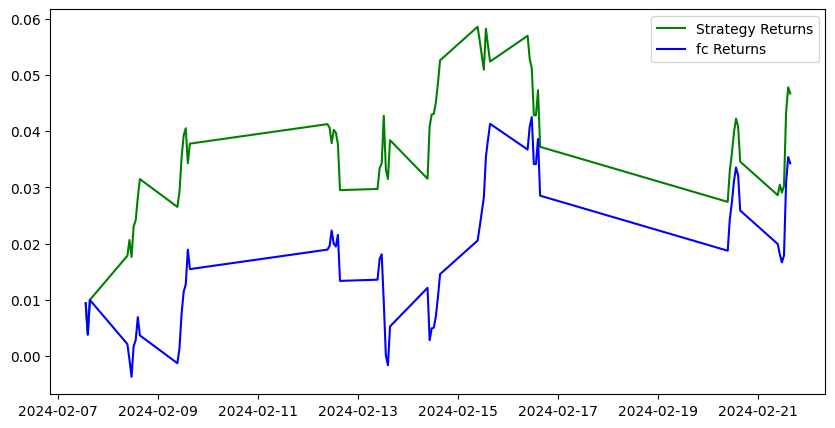

In [256]:
fc_df['Predicted_Signal'] = model.predict(X)
fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))

Cumulative_fc_returns = np.cumsum(fc_df[split:]['fc_returns'])


fc_df['Strategy_returns'] = fc_df['fc_returns']* fc_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(fc_df[split:]['Strategy_returns'])


# show result
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_fc_returns, color='b', label = 'fc Returns')
plt.legend()
plt.show()

Cross-Validation

In [257]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.59090909 0.68181818 0.54545455 0.5        0.36363636 0.54545455
 0.68181818 0.5        0.59090909 0.42857143]
0.5428571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Create Trading Strategy Using The Model

<ipython-input-258-0b3ce4a110af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['Predicted_Signal'] = model.predict(X)
<ipython-input-258-0b3ce4a110af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))
<ipython-input-258-0b3ce4a110af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

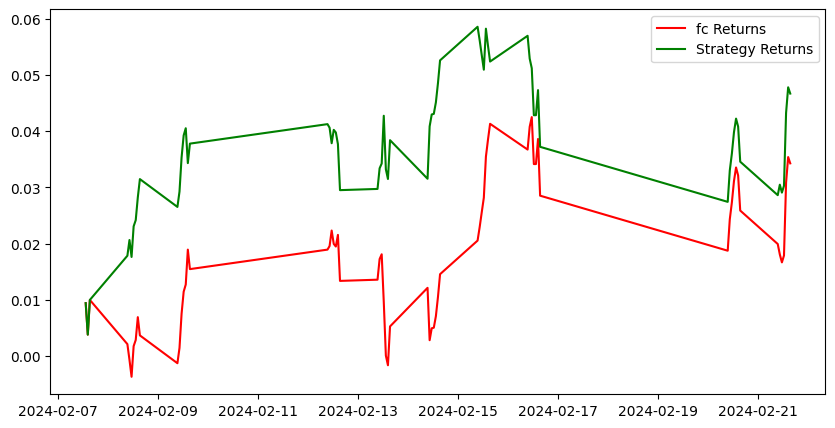

In [258]:
fc_df['Predicted_Signal'] = model.predict(X)
fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))
Cumulative_fc_returns = np.cumsum(fc_df[split:]['fc_returns'])

fc_df['Startegy_returns'] = fc_df['fc_returns']* fc_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(fc_df[split:]['Startegy_returns'])

#set_price_df['']

plt.figure(figsize=(10,5))
plt.plot(Cumulative_fc_returns, color='r',label = 'fc Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

#เทียบหุ้นกับหุ้นหลักในตลาด เลือก NASDAQ

In [287]:
from posixpath import splitdrive
NASDAQ = yf.Ticker('^IXIC')
interval = '1h'
start = '2024-1-1'
end = '2024-2-20'
NASDAQ_df = NASDAQ.history(interval=interval,start=start,end=end)
NASDAQ_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-01-02 09:30:00-05:00,14878.449219,14885.728516,14746.874023,14761.033203,0,0.0,0.0
2024-01-02 10:30:00-05:00,14758.649414,14796.063477,14723.750000,14796.028320,689850000,0.0,0.0
2024-01-02 11:30:00-05:00,14796.418945,14828.551758,14796.418945,14805.435547,452142000,0.0,0.0
2024-01-02 12:30:00-05:00,14805.388672,14828.466797,14757.442383,14777.566406,406365000,0.0,0.0
2024-01-02 13:30:00-05:00,14778.095703,14784.515625,14724.745117,14744.322266,430341000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,15881.376953,15898.850586,15866.446289,15885.657227,492487000,0.0,0.0
2024-02-16 12:30:00-05:00,15885.925781,15889.690430,15824.967773,15847.976562,418445000,0.0,0.0
2024-02-16 13:30:00-05:00,15847.605469,15904.398438,15843.815430,15896.328125,375525000,0.0,0.0


In [288]:
#หาค่า mean ของราคาหุ้นในช่วง 14 วัน
NASDAQ_df['S_14'] = NASDAQ_df['Close'].rolling(window=14).mean()
#ดู correlation ของราคาปิดในช่วง 14 วัน
NASDAQ_df['Corr'] = NASDAQ_df['Close'].rolling(window=14).corr(NASDAQ_df['S_14'])
#ดู RSI ของหุ้นในช่วง 14 วัน
NASDAQ_df['RSI'] = ta.RSI(np.array(NASDAQ_df['Close']), timeperiod =14)
NASDAQ_df['Open-Close'] = NASDAQ_df['Open'] - NASDAQ_df['Close'].shift(1)
NASDAQ_df['Open-Open'] = NASDAQ_df['Open'] - NASDAQ_df['Open'].shift(1)
NASDAQ_df = NASDAQ_df.dropna()
X1 = NASDAQ_df.iloc[:,:9]
X1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_14,Corr
Datetime,,,,,,,,,
2024-01-05 14:30:00-05:00,14542.994141,14548.266602,14478.014648,14489.408203,450668000,0.0,0.0,14558.630650,0.693040
2024-01-05 15:30:00-05:00,14488.865234,14530.956055,14478.736328,14522.269531,407867000,0.0,0.0,14553.854492,0.704868
2024-01-08 09:30:00-05:00,14565.093750,14676.503906,14561.234375,14673.476562,0,0.0,0.0,14561.131696,0.329782
2024-01-08 10:30:00-05:00,14680.874023,14704.231445,14676.969727,14684.652344,691828000,0.0,0.0,14565.853655,-0.000478
2024-01-08 11:30:00-05:00,14685.120117,14727.406250,14685.120117,14713.699219,738500000,0.0,0.0,14574.992257,-0.129923
...,...,...,...,...,...,...,...,...,...
2024-02-16 11:30:00-05:00,15881.376953,15898.850586,15866.446289,15885.657227,492487000,0.0,0.0,15845.307757,0.467303
2024-02-16 12:30:00-05:00,15885.925781,15889.690430,15824.967773,15847.976562,418445000,0.0,0.0,15852.669852,0.419695
2024-02-16 13:30:00-05:00,15847.605469,15904.398438,15843.815430,15896.328125,375525000,0.0,0.0,15861.602121,0.420946


In [289]:
y1 = np.where(NASDAQ_df['Close'].shift(-1) > NASDAQ_df['Close'],1,-1)

In [292]:
split = int(0.7*len(NASDAQ_df))
X1_train, X1_test, y1_train, y1_test = X1[:split], X1[split:], y1[:split], y1[split:]

In [293]:
model = LogisticRegression()
model = model.fit (X1_train,y1_train)

In [294]:
pd.DataFrame(zip(X1.columns, np.transpose(model.coef_)))

,0,1
0,Open,[9.617668266305709e-06]
1,High,[9.65995583219961e-06]
2,Low,[9.631228519627381e-06]
3,Close,[9.657319232788654e-06]
4,Volume,[-4.392105972176122e-10]
5,Dividends,[0.0]
6,Stock Splits,[0.0]
7,S_14,[9.601991975273176e-06]
8,Corr,[7.573051896103486e-11]


In [295]:
prediction_date = '2024-02-23'
probability = model.predict_proba(X1_test)
print(probability)

[[0.38003222 0.61996778]
 [0.37334104 0.62665896]
 [0.35892635 0.64107365]
 [0.35664444 0.64335556]
 [0.36070157 0.63929843]
 [0.36270461 0.63729539]
 [0.31959825 0.68040175]
 [0.37540023 0.62459977]
 [0.3599683  0.6400317 ]
 [0.35652625 0.64347375]
 [0.35570418 0.64429582]
 [0.35848611 0.64151389]
 [0.36261587 0.63738413]
 [0.3189682  0.6810318 ]
 [0.41295447 0.58704553]
 [0.3792767  0.6207233 ]
 [0.36454105 0.63545895]
 [0.36868846 0.63131154]
 [0.36627429 0.63372571]
 [0.36656127 0.63343873]
 [0.31786663 0.68213337]
 [0.39705102 0.60294898]
 [0.36846009 0.63153991]
 [0.3645248  0.6354752 ]
 [0.35959223 0.64040777]
 [0.36587657 0.63412343]
 [0.36349316 0.63650684]
 [0.31663311 0.68336689]
 [0.39094919 0.60905081]
 [0.37073649 0.62926351]
 [0.36169405 0.63830595]
 [0.36494795 0.63505205]
 [0.36121812 0.63878188]
 [0.363786   0.636214  ]
 [0.3192284  0.6807716 ]
 [0.38346484 0.61653516]
 [0.36555631 0.63444369]
 [0.35963031 0.64036969]
 [0.36027961 0.63972039]
 [0.37301888 0.62698112]


In [296]:
predicted = model.predict(X1_test)
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [297]:
print(metrics.confusion_matrix(y1_test, predicted))

[[ 0 29]
 [ 0 33]]


In [298]:
print(model.score(X1_test,y1_test))

0.532258064516129


<ipython-input-299-5571bb07e822>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['Predicted_Signal'] = model.predict(X)
<ipython-input-299-5571bb07e822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))
<ipython-input-299-5571bb07e822>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

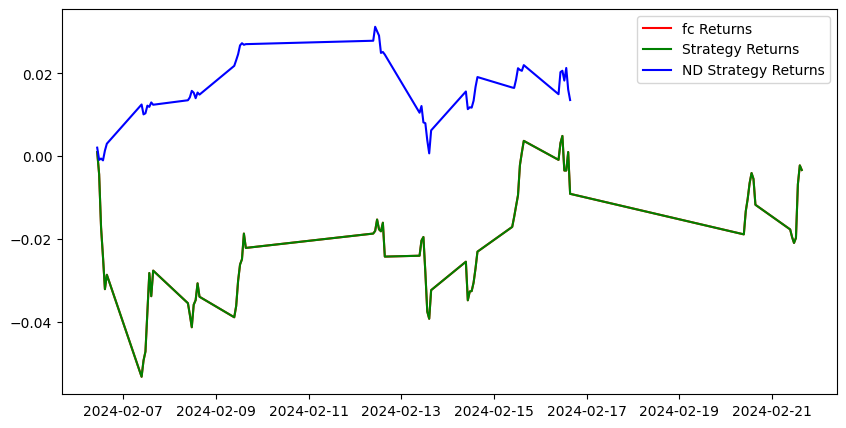

In [299]:
fc_df['Predicted_Signal'] = model.predict(X)
fc_df['fc_returns'] = np.log(fc_df['Close']/fc_df['Close'].shift(1))
NASDAQ_df['nq_returns'] = np.log(NASDAQ_df['Close']/NASDAQ_df['Close'].shift(1))
NASDAQ_df['ND_Predicted_Signal'] = model.predict(X1)

Cumulative_fc_returns = np.cumsum(fc_df[split:]['fc_returns'])
fc_df['Startegy_returns'] = fc_df['fc_returns']* fc_df['Predicted_Signal'].shift(1)
NASDAQ_df['ND_Startegy_returns'] = NASDAQ_df['nq_returns']* NASDAQ_df['ND_Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(fc_df[split:]['Startegy_returns'])
Cumulative_NASDAQ_returns = np.cumsum(NASDAQ_df['Close']/NASDAQ_df['Close'].shift(1))
Cumulative_NDStrategy_returns = np.cumsum(NASDAQ_df[split:]['ND_Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_fc_returns, color='r',label = 'fc Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
#plt.plot(Cumulative_NASDAQ_returns, color='y',label = 'ND Returns')
plt.plot(Cumulative_NDStrategy_returns, color='b', label = 'ND Strategy Returns')

plt.legend()
plt.show()

# B.เพิ่ม feature (column) ต่างๆ ที่เราสนใจ จากนั้นให้ทำซ้ำตามข้อ (a.) แล้วแสดงผลลัพธ์ของกราฟเปรียบเทียบกับกราฟในข้อ a.

In [312]:
fc_df1 = fc_df.dropna()
# Calculate the 50-period simple moving average (SMA) for the 'Close' price
fc_df1['SMA_50'] = fc_df1['Close'].rolling(window=50).mean()
#fc_df1
# Calculate the 12-period EMA
ema_12 = fc_df1['Close'].ewm(span=12, min_periods=12).mean()

# Calculate the 26-period EMA
ema_26 = fc_df1['Close'].ewm(span=26, min_periods=26).mean()

# Calculate the MACD line
macd_line = ema_12 - ema_26

# Add MACD to DataFrame
fc_df1['MACD'] = macd_line

fc_df1 = fc_df1.dropna()
#fc_df1

# Select features for X2 including RSI condition columns
#X2 = fc_df1[['Open', 'High', 'Low', 'Close', 'Volume', 'S_14', 'Corr', 'RSI', 'Open-Close', 'Open-Open', 'SMA_50','MACD']]
X2 = fc_df1[['Open', 'High', 'Low', 'Close', 'Volume', 'S_14', 'Corr', 'RSI', 'Open-Close','SMA_50','MACD']]
X2

<ipython-input-312-09930b6d1146>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df1['SMA_50'] = fc_df1['Close'].rolling(window=50).mean()
<ipython-input-312-09930b6d1146>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df1['MACD'] = macd_line


,Open,High,Low,Close,Volume,S_14,Corr,RSI,Open-Close,SMA_50,MACD
Datetime,,,,,,,,,,,
2024-01-17 15:30:00-05:00,1372.510010,1376.500000,1372.219971,1372.219971,13525,1382.691075,0.818793,40.830754,4.310059,1391.874883,-5.302466
2024-01-18 09:30:00-05:00,1377.439941,1383.290039,1375.520020,1383.290039,4509,1382.352504,0.709094,48.834785,5.219971,1391.846685,-4.583710
2024-01-18 10:30:00-05:00,1388.550049,1388.550049,1377.439941,1380.250000,3093,1381.115365,0.635685,46.956248,5.260010,1391.454355,-4.206753
2024-01-18 11:30:00-05:00,1374.780029,1377.849976,1371.770020,1377.849976,6041,1379.466788,0.543577,45.469187,-5.469971,1390.941155,-4.051874
2024-01-18 12:30:00-05:00,1377.329956,1381.949951,1372.800049,1372.800049,8071,1378.086077,0.480205,42.424739,-0.520020,1390.339956,-4.281256
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-21 11:30:00-05:00,1498.579956,1502.199951,1493.849976,1496.599976,5437,1512.742850,0.321412,42.187277,-0.130005,1502.791575,-0.082898
2024-02-21 12:30:00-05:00,1497.964966,1502.569946,1493.300049,1498.430054,7473,1510.987854,0.587281,43.469855,1.364990,1503.100176,-0.943552
2024-02-21 13:30:00-05:00,1506.959961,1519.219971,1504.729980,1517.969971,8581,1510.628566,0.451015,54.959391,8.529907,1503.683176,-0.048360


In [313]:
y = np.where(fc_df1['Close'].shift(-1) > fc_df1['Close'],1,-1)

In [314]:
split = int(0.7*len(fc_df1))
X2_train, X2_test, y_train, y_test = X2[:split], X2[split:], y[:split], y[split:]

In [315]:
model = LogisticRegression()
model = model.fit (X2_train,y_train)
model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [316]:
pd.DataFrame(zip(X2.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.08035832733251236]
1,High,[-0.07566476776964069]
2,Low,[-0.05175059099949843]
3,Close,[0.026237533808829764]
4,Volume,[-4.352168960175659e-06]
5,S_14,[0.005930151768304704]
6,Corr,[-0.011876505606320437]
7,RSI,[0.01814080161941899]
8,Open-Close,[0.04651429421201171]
9,SMA_50,[0.014646721227305802]


In [317]:
prediction_date = '2024-02-23'
probability = model.predict_proba(X2_test)
print(probability)

[[0.44095378 0.55904622]
 [0.36886733 0.63113267]
 [0.36692404 0.63307596]
 [0.4219171  0.5780829 ]
 [0.36710468 0.63289532]
 [0.42994843 0.57005157]
 [0.46284034 0.53715966]
 [0.41164728 0.58835272]
 [0.37927931 0.62072069]
 [0.54279779 0.45720221]
 [0.37829347 0.62170653]
 [0.50152722 0.49847278]
 [0.30949896 0.69050104]
 [0.28566162 0.71433838]
 [0.21697144 0.78302856]
 [0.43199564 0.56800436]
 [0.41912256 0.58087744]
 [0.28555016 0.71444984]
 [0.22250339 0.77749661]
 [0.35325545 0.64674455]
 [0.33971581 0.66028419]
 [0.41489833 0.58510167]
 [0.43440802 0.56559198]
 [0.66517541 0.33482459]
 [0.5458177  0.4541823 ]
 [0.53127319 0.46872681]
 [0.41439805 0.58560195]
 [0.50974713 0.49025287]
 [0.61188121 0.38811879]
 [0.49646238 0.50353762]
 [0.5238932  0.4761068 ]
 [0.62964357 0.37035643]
 [0.49914552 0.50085448]
 [0.68640328 0.31359672]
 [0.44654672 0.55345328]
 [0.34898039 0.65101961]
 [0.3997331  0.6002669 ]
 [0.37487791 0.62512209]
 [0.43727869 0.56272131]
 [0.45853925 0.54146075]


In [318]:
predicted = model.predict(X2_test)
print(predicted)

[ 1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1]


In [319]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 3 17]
 [ 8 23]]


In [320]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.27      0.15      0.19        20
           1       0.57      0.74      0.65        31

    accuracy                           0.51        51
   macro avg       0.42      0.45      0.42        51
weighted avg       0.46      0.51      0.47        51



In [321]:
print(model.score(X2_test,y_test))

0.5098039215686274


In [322]:
fc_df1['Predicted_Signal'] = model.predict(X2)
fc_df1['fc_returns1'] = np.log(fc_df1['Close']/fc_df1['Close'].shift(1))

Cumulative_fc_returns = np.cumsum(fc_df1[split:]['fc_returns1'])


fc_df1['Strategy_returns'] = fc_df1['fc_returns1']* fc_df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(fc_df1[split:]['Strategy_returns'])

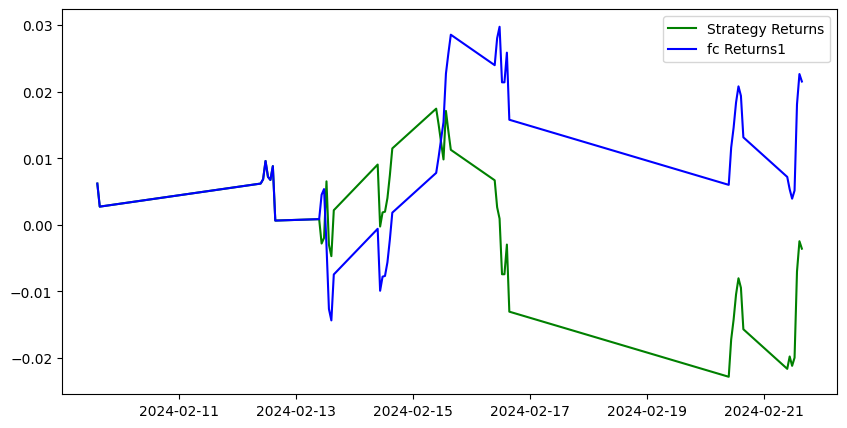

In [323]:
# show result
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_fc_returns, color='b', label = 'fc Returns1')
plt.legend()
plt.show()